In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
sns.set_style("dark")
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
import pickle
import re


In [78]:
train = pd.read_csv('../data/train.csv')
test  = pd.read_csv('../data/test.csv')
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)
y_pred = train['SalePrice']
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

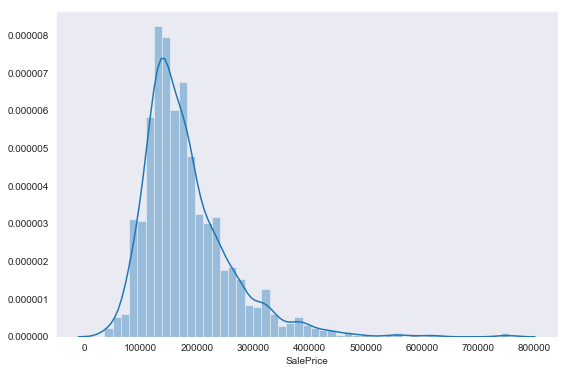

In [9]:
plt.figure(figsize=(9, 6))
sns.distplot(train['SalePrice'])

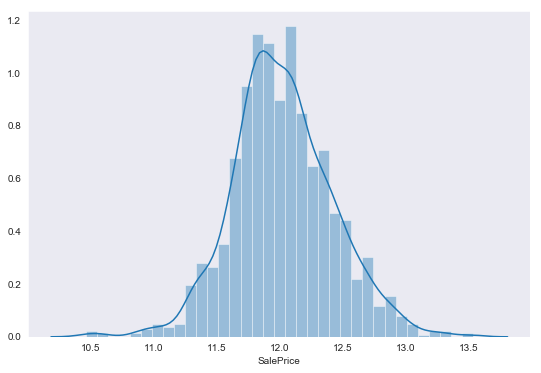

In [11]:
plt.figure(figsize=(9, 6))
sns.distplot(np.log1p(train['SalePrice']));

## Start EDA

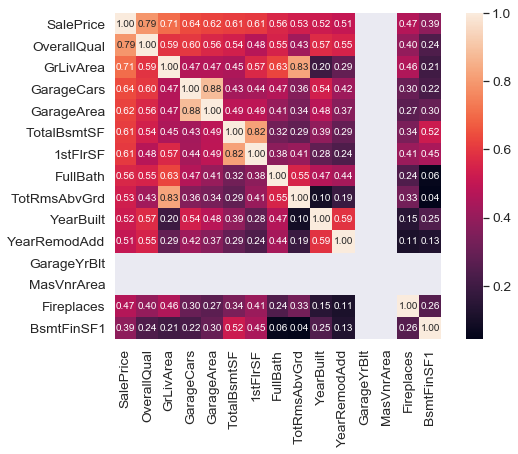

In [25]:
plt.figure(figsize=(9, 6))
corrmat = train.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## GarageCars & GagageArea has Multicollinearity so take 1 feature 

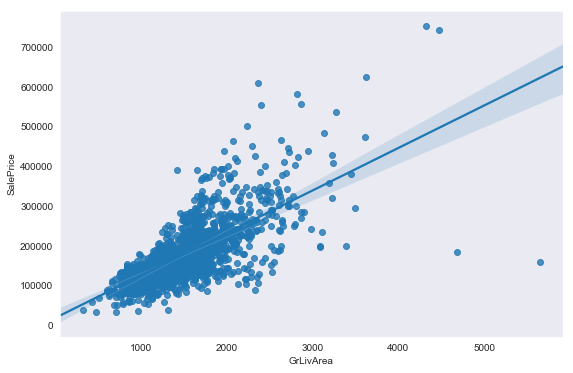

In [14]:
plt.figure(figsize=(9, 6))
sns.regplot(x='GrLivArea', y="SalePrice", data=train)
# GrLivArea > 4000 and SalePrice < 13 seems outliers

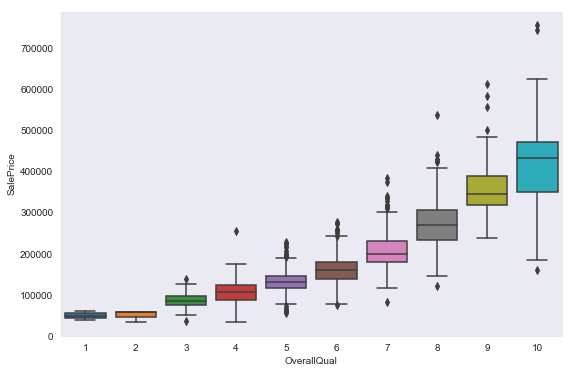

In [15]:
plt.figure(figsize=(9, 6))
sns.boxplot(x='OverallQual', y="SalePrice", data=train)

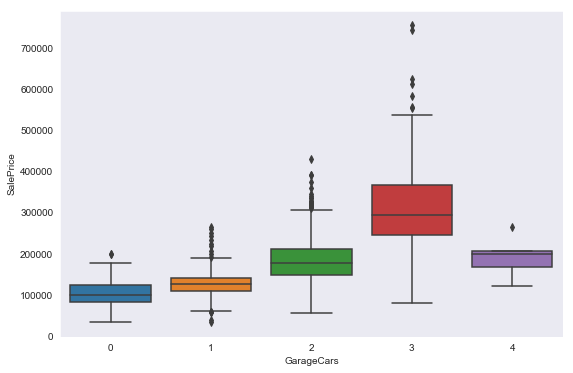

In [18]:
plt.subplots(figsize=(9, 6))
sns.boxplot(x='GarageCars', y="SalePrice", data=train)

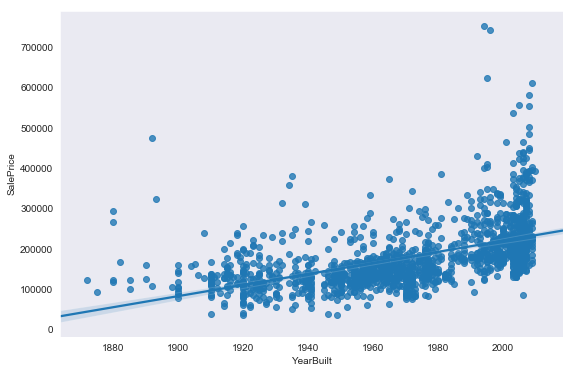

In [20]:
plt.subplots(figsize=(9, 6))
sns.regplot(x='YearBuilt', y="SalePrice", data=train)

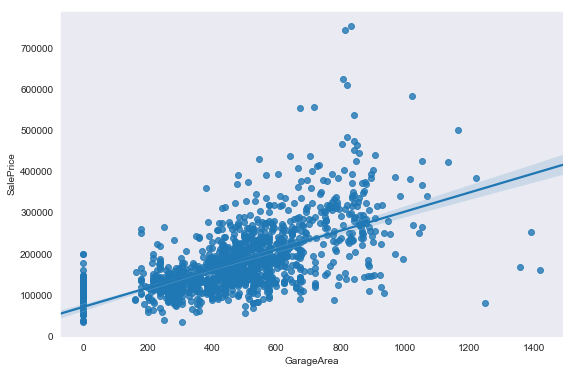

In [23]:
plt.subplots(figsize=(9, 6))
sns.regplot(x='GarageArea', y="SalePrice", data=train)

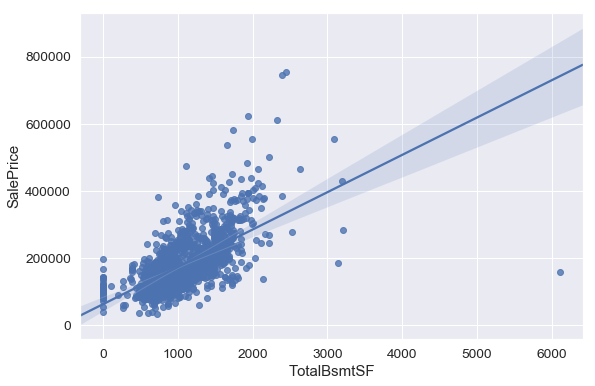

In [28]:
plt.subplots(figsize=(9, 6))
sns.regplot(x='TotalBsmtSF', y="SalePrice", data=train)

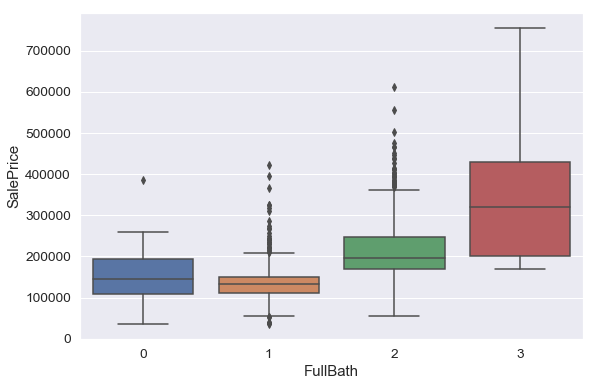

In [31]:
plt.subplots(figsize=(9, 6))
sns.boxplot(x='FullBath', y="SalePrice", data=train) 
# why 1 Full bathroom is under than 0 ? 

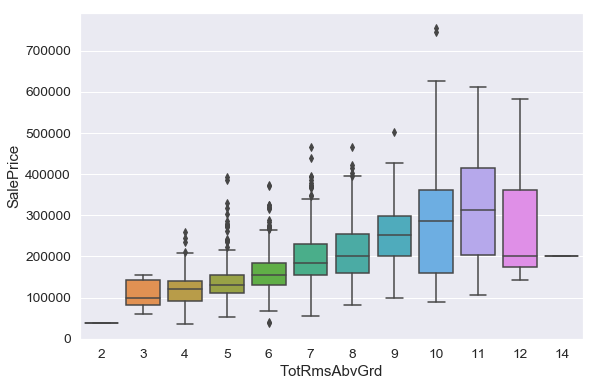

In [34]:
plt.subplots(figsize=(9, 6))
sns.boxplot(x='TotRmsAbvGrd', y="SalePrice", data=train)

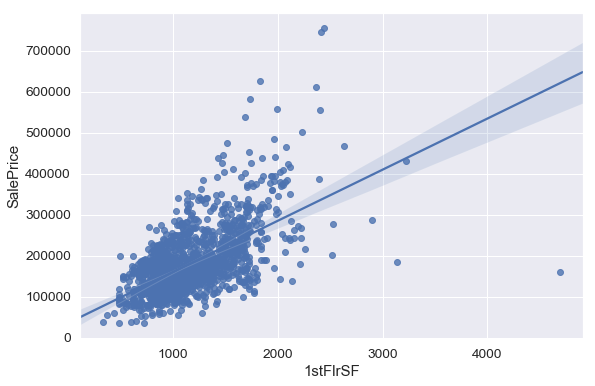

In [35]:
plt.subplots(figsize=(9, 6))
sns.regplot(x='1stFlrSF', y="SalePrice", data=train)

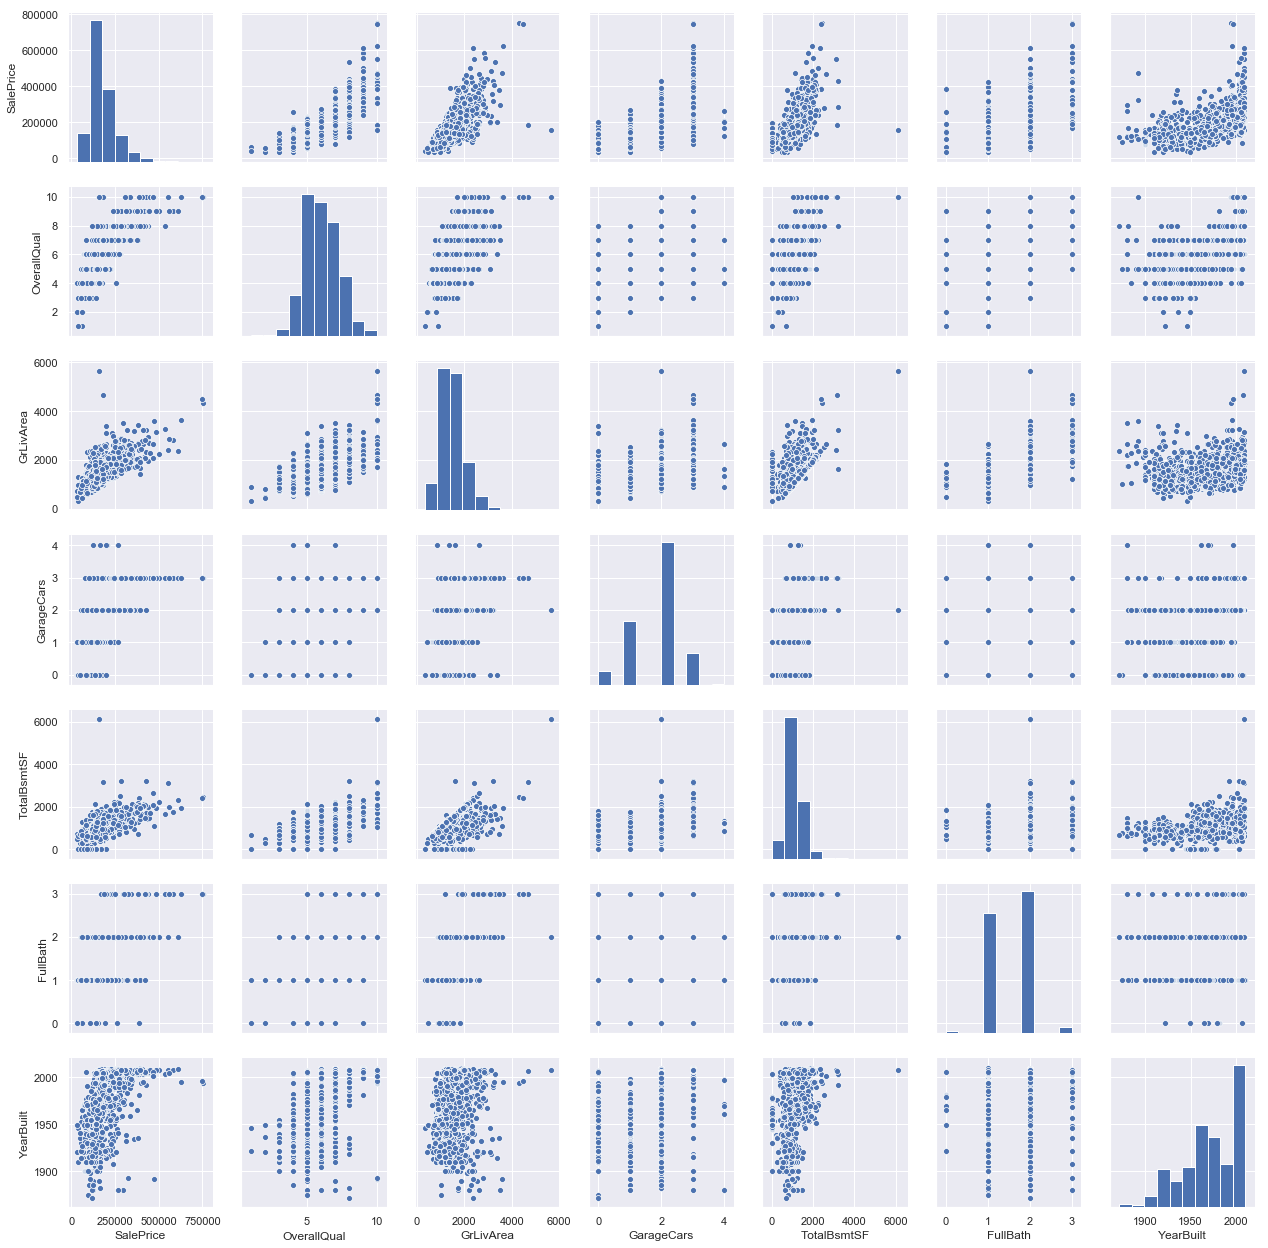

In [36]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height = 2.5)
plt.show();

## missing 

In [37]:
#missing data
combined_data = pd.concat((train, test))

total = combined_data.isnull().sum().sort_values(ascending=False)
percent = (combined_data.isnull().sum()/combined_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

/Users/hellothere/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


Text(0.5, 1.0, 'Total Missing Value (%)')

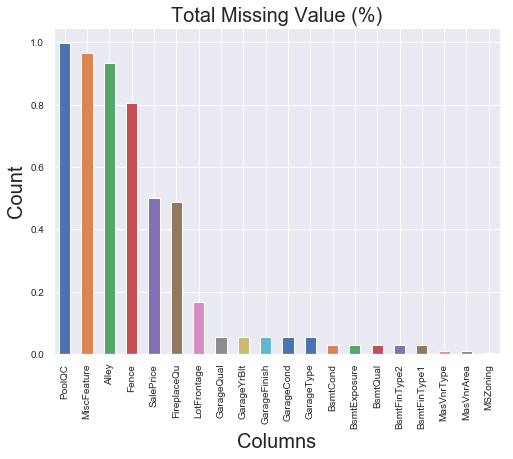

In [38]:
#histogram
#missing_data = missing_data.head(20)
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

## Outlier 
    - GrLivArea > 4000 and SalePrice < 13 seems outliers ( 523, 1298 )
    - The point of TotalBsmtSF >6000 seems outlier #  1298 
    - TotRmsAbvGrd : Very low values in 6 very high value at 10 # 30 ,691 , 1182

In [45]:
train[(train['GrLivArea'] >4000) & (np.log1p(train['SalePrice'])<12.5)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [55]:
train[(train['TotRmsAbvGrd'] == 10) & ( train['SalePrice'] >= 650000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


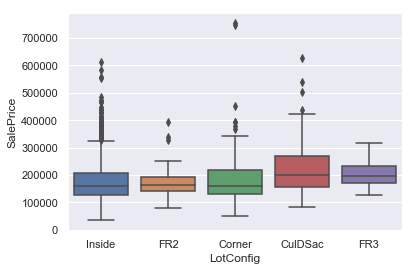

In [61]:
sns.boxplot(train['LotConfig'], train['SalePrice']) # 691 , 1182

## Column Drop

In [ ]:
## drop columns over the 40% 
total = X.isnull().sum().sort_values(ascending=False)
percent = (X.isnull().sum() / X.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
features_to_drop = missing_data[missing_data['Percent'] > 0.4].index

In [58]:
train['Utilities'].describe()
## Drop 

count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object

In [144]:
train['TotBathrooms']  = train['FullBath']  + (train['HalfBath'] * 0.5) + train['BsmtFullBath'] + (train['BsmtHalfBath'] * 0.5)

,GrLivArea,FullBath,HalfBath,BsmtFullBath
379,1200,3,0,3.0


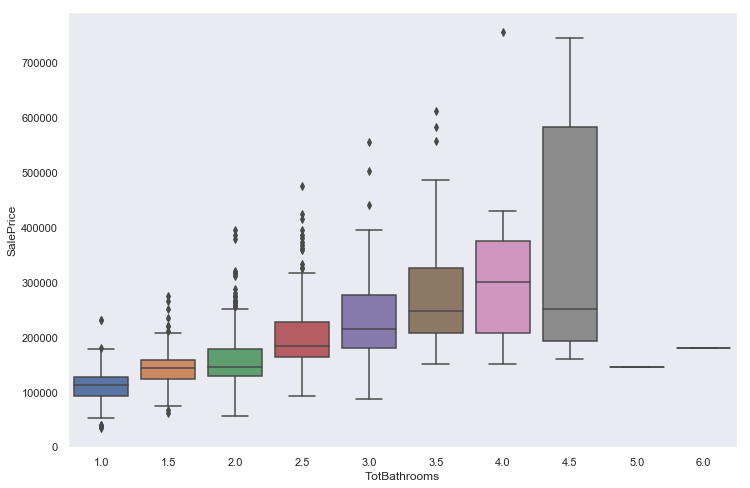

In [157]:
sns.boxplot(train['TotBathrooms'], train['SalePrice'])# 691 , 1182
# train[train['TotBathrooms']== 6] # 921 , 738
# train.loc[921,['FullBath','HalfBath','BsmtFullBath']]
#train[['GrLivArea','FullBath','HalfBath','BsmtFullBath']][train['BsmtFullBath']==3]
test[['GrLivArea','FullBath','HalfBath','BsmtFullBath']][test['BsmtFullBath']==3]

In [69]:
train['Age'] = train['YrSold'] - train['YearRemodAdd']
train['isNew'] = np.where(train['YrSold'] == train['YearBuilt'], 1, 0)
train['isCentralAir'] = np.where(train['CentralAir'] == 'Y', 1, 0)

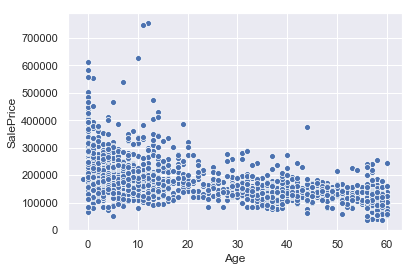

In [71]:
sns.scatterplot(train['Age'], train['SalePrice'])# 691 , 1182

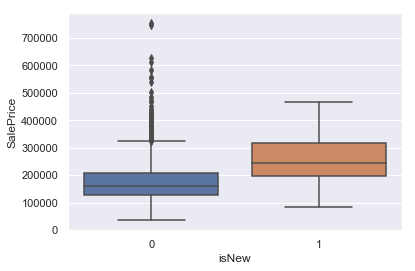

In [73]:
sns.boxplot(train['isNew'], train['SalePrice'])# 691 , 1182

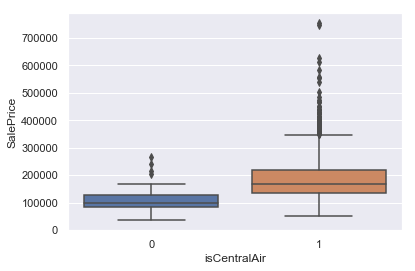

In [75]:
sns.boxplot(train['isCentralAir'], train['SalePrice'])# 691 , 1182

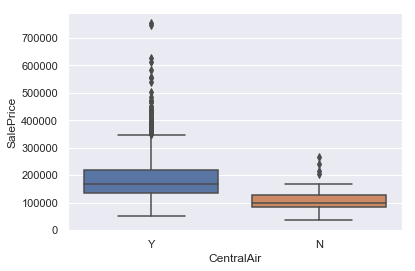

In [76]:
sns.boxplot(train['CentralAir'], train['SalePrice'])# 691 , 1182

## Modify Data Type 

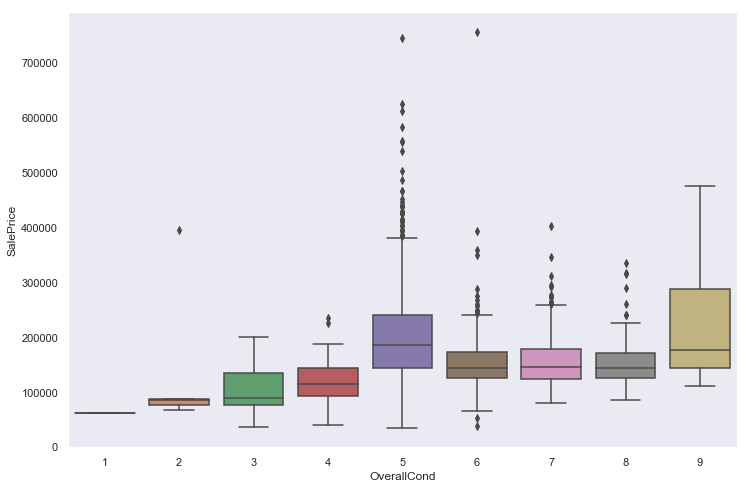

In [83]:
sns.boxplot(train['OverallCond'], train['SalePrice'])  
#X["OverallCond"] = X["OverallCond"].astype(str)

In [ ]:
train["MoSold"] = train["MoSold"].astype(str)
train["YrSold"] = train["YrSold"].astype(str)
train["isNew"]  = train["isNew"].astype(str)
train["MSSubClass"]  = train["MSSubClass"].astype(str)
train["OverallCond"] = train["OverallCond"].astype(str)

## Add Feature 

In [84]:
train['TotalArea'] = train["TotalBsmtSF"] + train["1stFlrSF"] + train["2ndFlrSF"] + train["GarageArea"]
train["TotalHouse"] = train["TotalBsmtSF"] + train["1stFlrSF"] + train["2ndFlrSF"]

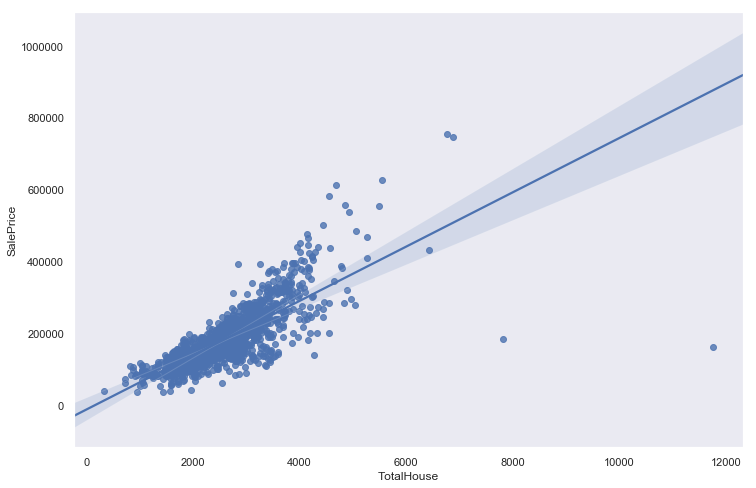

In [92]:
#sns.scatterplot(train['TotalArea'], train['SalePrice'])
sns.regplot(train['TotalHouse'], train['SalePrice'])

In [88]:
train['Total_porch_sf'] = train['OpenPorchSF'] + train['3SsnPorch'] + train['EnclosedPorch'] + train['ScreenPorch'] + train['WoodDeckSF']

/Users/hellothere/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


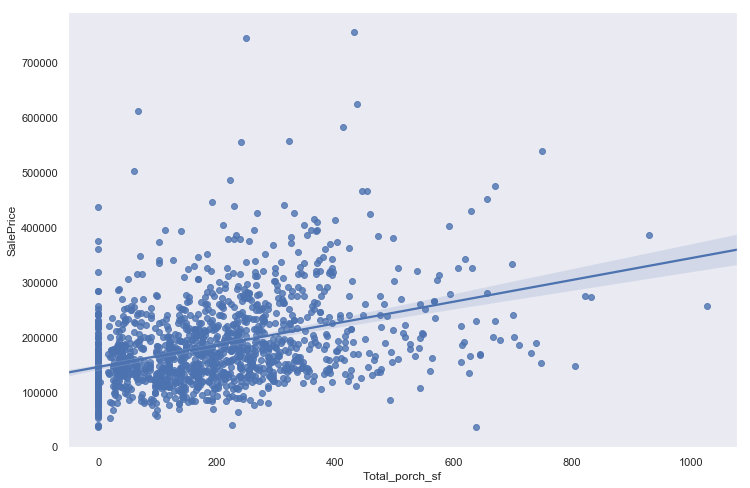

In [90]:
sns.regplot(train['Total_porch_sf'], train['SalePrice'])

/Users/hellothere/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


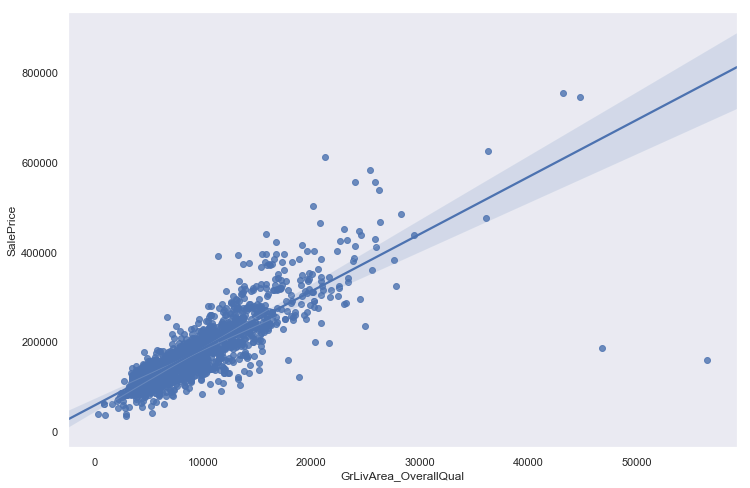

In [96]:
#train['GrLivArea']
train['GrLivArea_OverallQual']= train['GrLivArea'] * train['OverallQual']
sns.regplot(train['GrLivArea_OverallQual'], train['SalePrice'])

In [100]:
train[['LotFrontage' , 'LotArea']]

,LotFrontage,LotArea
0,65.0,8450
1,80.0,9600
2,68.0,11250
3,60.0,9550
4,84.0,14260
5,85.0,14115
6,75.0,10084
7,NaN,10382
8,51.0,6120
9,50.0,7420


In [ ]:
sns.boxplot(train['Alley'], train['SalePrice'])
train['Alley'].fillna('None')

In [ ]:
# sns.boxplot(train['Fence'], train['SalePrice'])
#sns.boxplot(train['FireplaceQu'], train['SalePrice'])
train['hasfireplace'] = train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
sns.boxplot(train['hasfireplace'], train['SalePrice'])

In [130]:
# sns.scatterplot(train['GarageCars'], train['SalePrice'])
train[['TotalBsmtSF','GarageArea','GarageQual','GarageCond','GarageFinish','GarageYrBlt','GarageType']][train['GarageCars'] == 4]
train[train['GarageCars'] == 4]
test['GarageYrBlt'][test['GarageCars'] == 4]
train['GarageYrBlt'][train['GarageCars'] == 4]
# #train[train['GarageCars'].notnull() & train['GarageFinish'] == 'Unf'] 
# train[['GarageCars','GarageFinish','GarageCond','GarageQual']][(train['GarageCars'].notnull()) &(train['GarageFinish'] == 'Unf')] 


420     1997.0
747     1950.0
1190    1975.0
1340    1974.0
1350    1969.0
Name: GarageYrBlt, dtype: float64